---



## Predictive Modeling of Carbon Monoxide Levels in the Atmosphere





## Overview

In this project, we delve into the practical application of Logistic Regression. We provide a thorough explanation of the basics of Logistic Regression, walking through the step-by-step process of building, training, and evaluating a Logistic Regression model. Furthermore, we showcase the application of both linear and non-linear machine learning algorithms, shedding light on their strengths, weaknesses, and ideal use-cases.


### Logistic Regression(linear algorithm): A Hands-on Python Tutorial

One of the highlights of this project is a detailed, hands-on tutorial of Logistic Regression in Python. By using a simplified example, we will illustrate the intricate workings of Logistic Regression and familiarize you with the end-to-end process of building a machine learning model – starting from preprocessing and feature selection to model training, evaluation, and fine-tuning.

### Decision Tree (Non-linear algorithm):
There are various non-linear algorithm like random forest, decision tree, neural networks. I will cover some of these
algorithms. I will cover the details of these algorithms. Further, I will cover one example for these algorithms each using
scikit learn using the same dataset as that of logistic regression.

## 1 Logistic Regression:

## 1.1 Basic idea behind logistic regression:

Logistic regression is a predictive analysis.  Logistic Regression is generally used for classification purposes.
In logistic regression the dependent variable which we also call as "label" is $\textbf{categorical}$.
When the number of possible outcomes is only two it is called $\textbf{Binary Logistic Regression}$.


Examples of Logistic regression for binary classification:

1. To predict whether a political candidate will win or lose an election or whether a high school student will be admitted or not to a particular college.

2. Do body weight, calorie intake, fat intake, and age have an influence on the probability of having a heart attack (yes vs. no)?

## 1.2 How can we use logistic regression for classification tasks?
In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1.


## 1.3 Why do we use logistic regression and not linear regression for classification tasks?
Binary classification classifies the elements of a data set into two groups. For example, we try to investigate in the
relationship between the subscription of a magazine and the age of a subscriber. Here, we call age the feature x
and status of subscription the label y. We assume that y = 0 means not subscribed, and y = 1 means subscribed.

In this case if we use linear regression then the output will be the weighted sum of inputs. If we take the weighted sum of inputs as the output as we do in Linear Regression, the value can be more than 1 but we want a value between 0 and 1. That’s why Linear Regression can’t be used for classification tasks.

Whereas, Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1.



##### Figure 1:

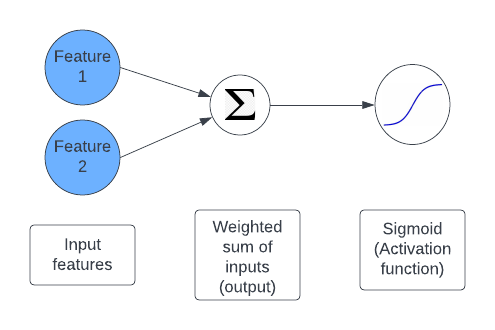

The activation function that is used is known as the $\textbf{sigmoid}$ function.
The formula for the sigmoid activaton function is given as:
$\boxed{S(x)=\frac{1}{1+e^{-x}}}$


##### Figure 2:

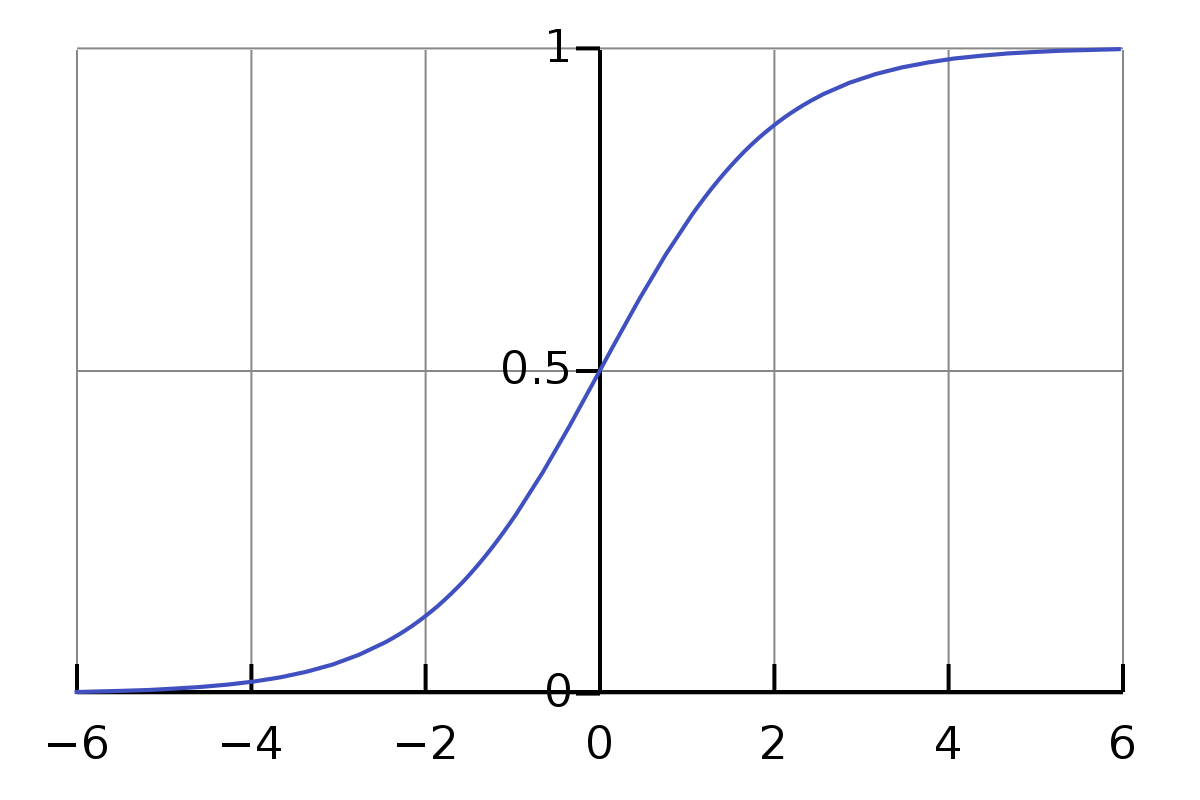

We can see that the value of the sigmoid function always lies between 0 and 1. The value is exactly 0.5 at X=0. We can use 0.5 as the probability threshold to determine the classes. If the probability is greater than 0.5, we classify it as Class-1(Y=1) or else as Class-0(Y=0).

## 1.4 Assumptions for logistic regression:

1. The dependent variable must be categorical
2. The independent variables(features) must be independent (to avoid multicollinearity).

## 1.5 Building logistic regression model in python:

To understand how a model is created, I have used a small dataset which consists of two features and a label(consists of 0 and 1).
I will use this dataset to build a model using python. 

#### The dataset used for this example is a small dummy dataset that I created to explain this example.

This example is to primarily used to explain how the logistic regression model can be built from
scratch using python and to get better understanding of logistic regression.

### 1.5.1 Steps to follow for creating a logistic regression model:

### Step1: Importing the required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the dataset and check the features and the labels:

In [22]:
data = pd.read_csv(r"C:\Users\gauri\OneDrive\Desktop\Mathematical Modelling for Chemical Engineering Processes\AirQualityUCI\Dataset.csv", None)

# X = feature values, all the columns except the last column
X1 = data.iloc[:, :-1]

# y = target values, last column of the data frame
y1 = data.iloc[:, -1]

# filter out Label 1
Label1 = data.loc[y1 == 1]

# filter out Label 0
Label0 = data.loc[y1 == 0]


 - I have segregated the datset to create one dataset for the labels and the other datset for the lables. I will further carry out logistic regression for binary classification.

### Step 3: Data visualization : Plot the features with the label and check the pattern of the data

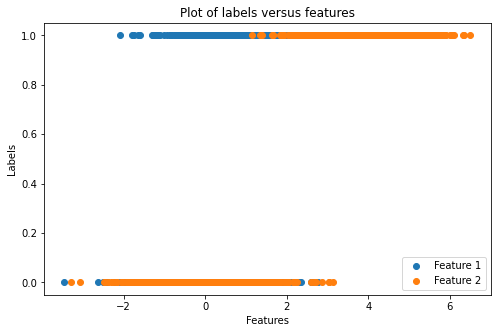

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(data.iloc[:, 0:1],y1,label='Feature 1')
plt.scatter(data.iloc[:, 1:2],y1,label='Feature 2')
plt.legend()
plt.xlabel("Features")
plt.ylabel("Labels")
plt.title("Plot of labels versus features")
plt.show();

 - As can be observed, the data is classified in 0s and 1s only. Fitting a linear regression model here will not be feasible.

#### Step 3a: Data visulalization :Plot the features against each other, and see how the data can be seperated

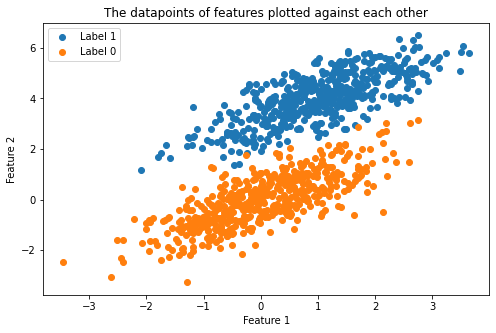

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(Label1.iloc[:, 0], Label1.iloc[:, 1], label='Label 1')
plt.scatter(Label0.iloc[:, 0], Label0.iloc[:, 1], label='Label 0')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("The datapoints of features plotted against each other")
plt.show();

 - The objective is to build a classifier that can predict whether any datapoint is for label 0 or label 1.

#### Step 3b: Making the datasets which will be required to train and test the model:

In [25]:
x1=np.ones([X1.shape[0],1])
X=np.c_[x1,X1]
y = y1[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

## Step 4: Define the sigmoid function:

 Define the activation function used to map any real value between 0 and 1. 

The equation for the model can be represented as:
$h(x)=\theta_0+\theta_1x_1+\theta_2x_2$

We then apply the sigmoid function to the output of this equation:
$h(x)=\sigma(\theta_0+\theta_1x_1+\theta_2x_2)$

where the sigmoid function is represented by:
$\sigma(t)=\frac{1}{1+e^{-t}}$

The equation for logistic regression then becomes:
$h(x)=\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\theta_2x_2)}}$

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Step 5: Compute the weighted sum of inputs

In [27]:
def net_input(theta, x):
    return np.dot(x, theta)

## Step 6: Return the probability of the output (which is the sum of the weighted inputs) after passing through sigmoid

In [28]:
def probability(theta, x):
    return sigmoid(net_input(theta, x))

- If the weighted sum of inputs is greater than zero, the predicted class is 1 and vice-versa. 

## Step 7: Define cost function
Like Linear Regression, we will define a cost function for our model and the objective will be to minimize the cost.

The cost function for a single training example can be given by:

\begin{equation}
  f(x)=\begin{cases}
    -log(h(x)), & \text{if $y=1$}.\\
    -log(1-h(c)), & \text{if $y=0$}.
  \end{cases}
\end{equation}

The cost for all the training examples denoted by J(θ) can be computed by taking the average over the cost of all the training samples

\begin{equation}
J(\theta)=\frac{-1}{m}\sum_{i=1}^{m}[y^ilog(h(x^i))+(1-y^i)log(1-h(x^i))]
\end{equation}

where, 
$m$ is the number of training samples


In [29]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

## Step 8:  Use gradient descent to minimize the cost function:

\begin{equation}
\frac{\partial J(\theta)}{\partial d\theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h(x^i)-y^i)x^i_j
\end{equation}

In [30]:

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

## Step 9: Define the fit function which will be used to find the model parameters that minimizes the cost function:


In [13]:
def fit(x, y, theta):
    opt_weights = scipy.optimize.fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit( X, y, theta)
print(f"The parameters after minimizing the cost function are {parameters}.")

The parameters after minimizing the cost function are [-20.67945478  -7.11133029  11.54847307].


## Step 10: Plot the decision boundary:
To see how well the model performed we will plot the decision boundary

We have two features in this dataset and hence the equation as mentioned above is:

$h(x)=\theta_0+\theta_1x_1+\theta_2x_2$

As discussed earlier, if the weighted sum of inputs is greater than zero, the predicted class is 1 and vice-versa. So the decision boundary separating both the classes can be found by setting the weighted sum of inputs to 0.

Thus, equating $h(x)$ to 0 gives us,

$x_2=\frac{-\theta_0+\theta_1x_1}{\theta_2}$

We will plot our decision boundary on top of the plot we used for visualizing our dataset.

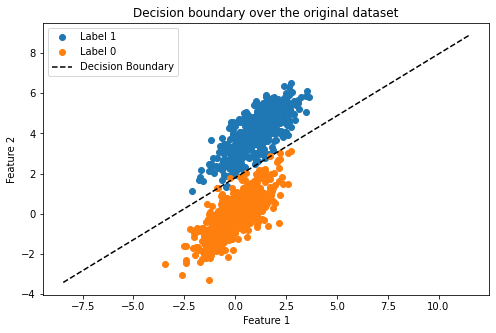

In [14]:

plt.figure(figsize=(8, 5))
plt.scatter(Label1.iloc[:, 0], Label1.iloc[:, 1], label='Label 1')
plt.scatter(Label0.iloc[:, 0], Label0.iloc[:, 1], label='Label 0')
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = -(parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values,'k--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Decision boundary over the original dataset")
plt.show()

## Step 11: Find the accuracy of the model:

In [15]:
def predict( x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy( x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
print(f"The accuracy of the model is {accuracy(X, y.flatten())}.")

The accuracy of the model is 99.5.


### Additional step: Building a model using scikit-learn and finding the accuracy of the model using the same dataset:

#### Import the libraries:

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Create model using the same dataset using scikit-learn:

In [33]:
logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f"The accuracy of the model using scikit-learn is {score*100} %.")

The accuracy of the model using scikit-learn is 99.66666666666667 %.


Results:
 - The accuracy of the model using python hard-coding is 99.5% and the accuracy of the model built using scikit-learn
is 99.66%.
 - The accuracy of both the models is very high. But this accuracy is not practically feasible. Hence we can consider these models as examples for creating models only.
 
Building a model from scratch using python is quite lengthy, the above example was particularly used to explain in detail how logistic regression works step by step.

Building a model using scikit learn is simpler and faster, hence we will build a model using scikit learn library.

## 1.6 Logistic Regression model using scikit learn:

### Dataset used: AirQualityUCI
### Brief Summary of the dataset:

The dataset contains the concentration of various air pollutants like NO2,CO,SO2 etc and based on these parameters the classification is done to predict the level of CO,based on the air quality standards. (Standard range in air-CO should be 0.06 to 0.14 mg/m3). To use this dataset for classification I have used a the level of CO present, and based on the standard range of CO, divided the level of CO into two categories (high=1 and low=0). 



## Logistic Regression for classification:

### Step 1: Importing all the required libraries:

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

### Step 2: Load the dataset and check the features and the labels:
The dataset constains 13 features indicating the pollutant levels. The last column has CO level, having labels 0 and 1 based on the air-quality standarnds. Hence this dataset can be used for the classification.

In [39]:
data=pd.read_excel(r"C:\Users\gauri\OneDrive\Desktop\Mathematical Modelling for Chemical Engineering Processes\AirQualityUCI\AirQualityUCI.xlsx")
display(data)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Level
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,1
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,1
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,1
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,1
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,1
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,1
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,1
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,1


### Checking the information of the dataset, if required:

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  CO_Level       9357 n

### Step 3: Data visualization : Plot the features and check the correlation of these features:
This plot shows the correlation of each feature with the other features. These plots are used to identiy the features that can be added in building the model. From t hese plots I have added three features-'PT08.S1(CO)','NMHC(GT)','C6H6(GT)' for the model. 
 

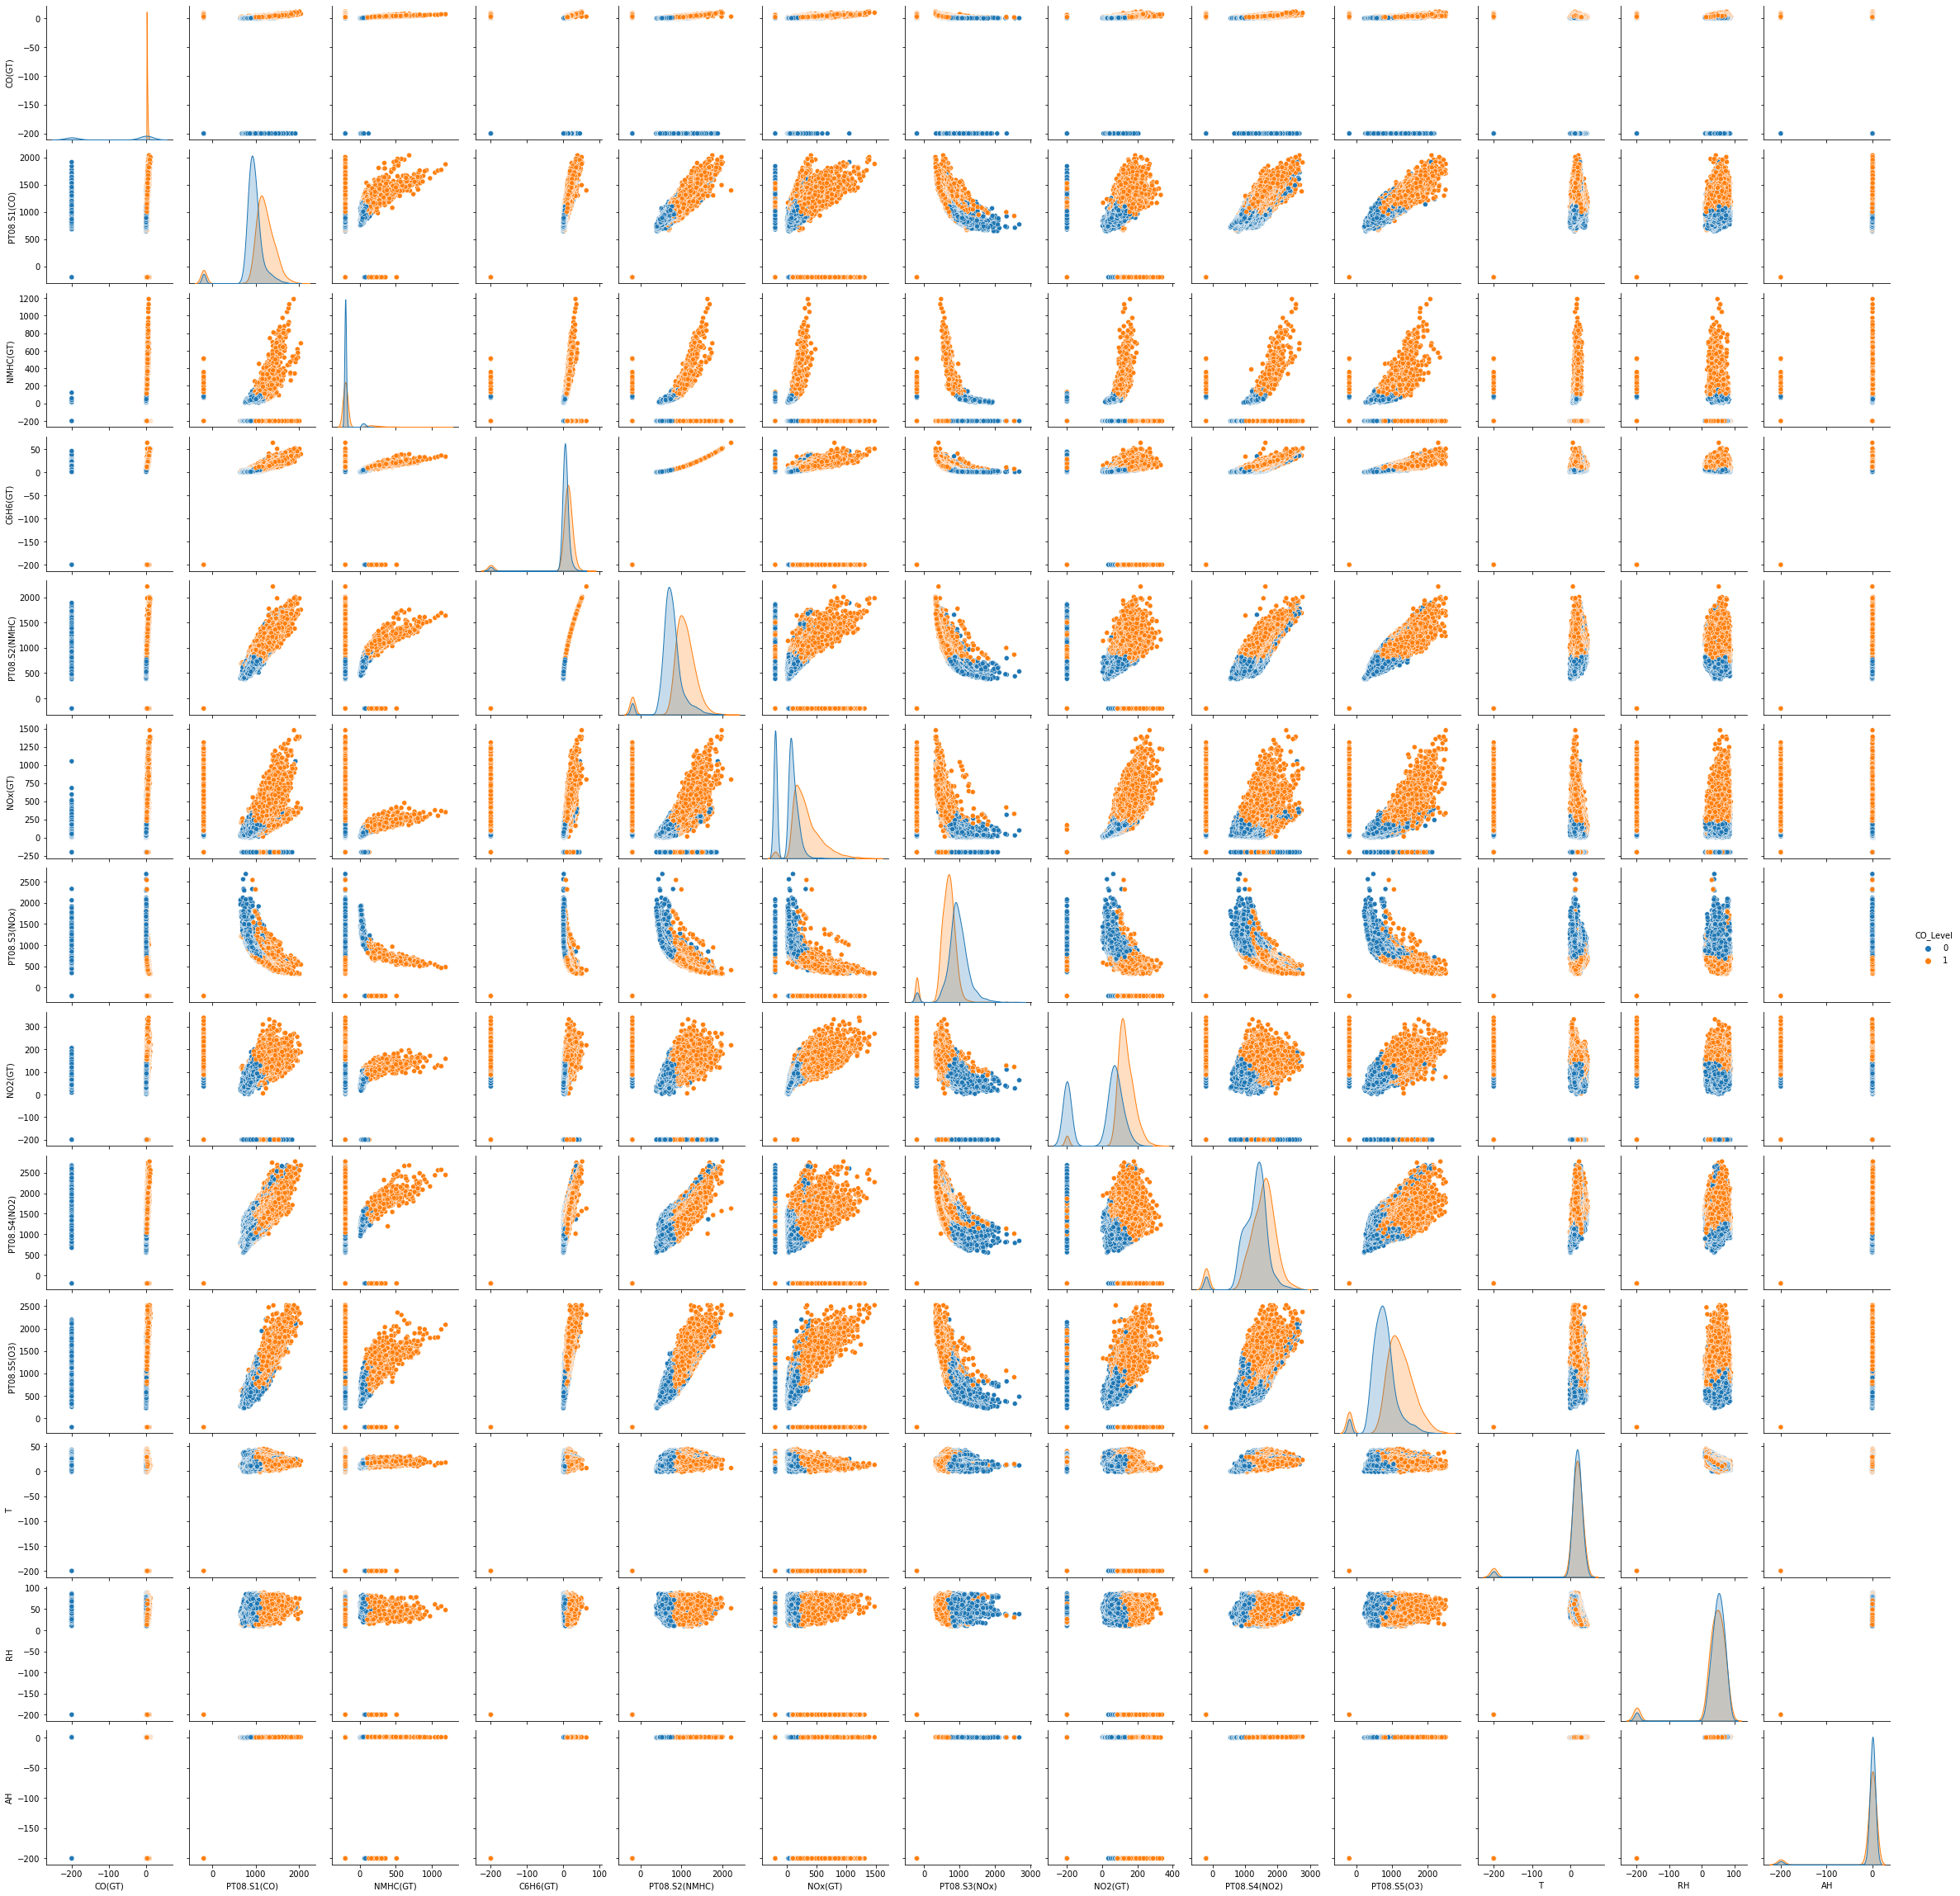

In [41]:
sns.pairplot(data=data,hue='CO_Level')
plt.show()

### Step 4: Create datasets with the chosen features and labels, then split the datasets into test and train sets:
The x dataset contains three chosen features and the y dataset contains the labels. The x dataset and y dataset is divided in the ratio of 7:3 that is, 70% datapoints are in the train dataset and 30% are in the test dataset.

In [42]:
x_1=data[['PT08.S1(CO)','NMHC(GT)','C6H6(GT)']]

In [43]:
y=data['CO_Level']
x=data.drop(['CO_Level','Date','Time'],axis=1)

In [44]:
x_1.isnull().sum()

PT08.S1(CO)    0
NMHC(GT)       0
C6H6(GT)       0
dtype: int64

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_1,y,test_size=0.30)

### Step 5: Define the Logistic Regression model for classification from sklearn:

In [46]:
logreg=LogisticRegression()

### Step 6: Fit the train set:

In [47]:
logreg.fit(x_train,y_train)

LogisticRegression()

### Step 7: After fitting the dataset, predict the values based on the test set:

In [48]:
y_pred=logreg.predict(x_test)

### Step 8: Check the accuracy of the model:
The accuracy of the model can be further imporved by tuning the hyperparameters and also by adding or removing features.

In [49]:
score=accuracy_score(y_test,y_pred)

In [50]:
print(f"The score of the logistic regression model is ",score*100)

The score of the logistic regression model is  76.74501424501425


### Step 9: Visualization of the performance of the model using Confusion matrix: 
A confusion matrix is a table layout that consists of two rows and two columns that reports the number of $\textbf{true positives}, \textbf{false negatives}, \textbf{false positives}$ and $\textbf{true negatives}$.

For a binary classification the confustion matrix looks like:
##### Figure 3:

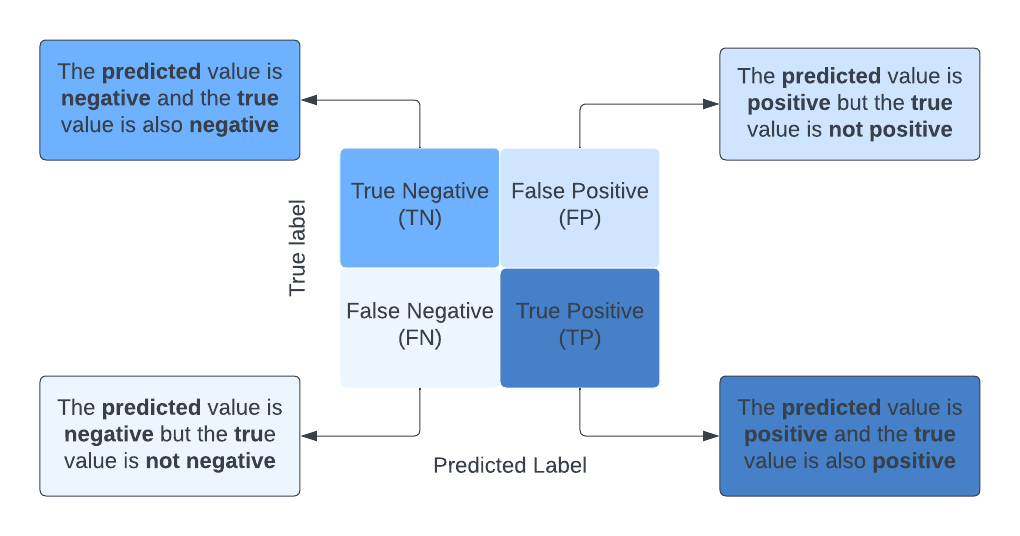


In [51]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

In [52]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

### The confusion matrix for the model :
The true negatives for this model are 1106, and the true positives are 1048. The model has predicted well, but there are some errors, which can be seen in the false positives (300) and the false negatives (354). These errors can be reduced by increasing the accuracy of the model.

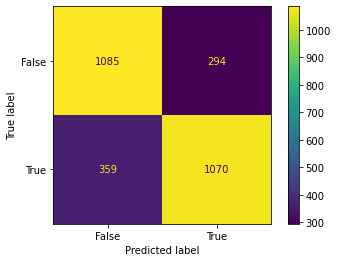

In [53]:
cm_display.plot()
plt.show()

## 2 Non-Linear algorithm for classification:

Non-Linear Classification refers to the features that are not linearly separable. These features can be classified by the non-linear algorithm for classification.

Some of the classifiers that use non-linear functions to separate classes are  Quadratic Discriminant Classifier, Multi-Layer Perceptron (MLP), Decision Trees, Random Forest, and K-Nearest Neighbours (KNN).


#### We will build a non-linear classification model using Decision Tree using the AirQuality dataset used for the logistic regression for classification model

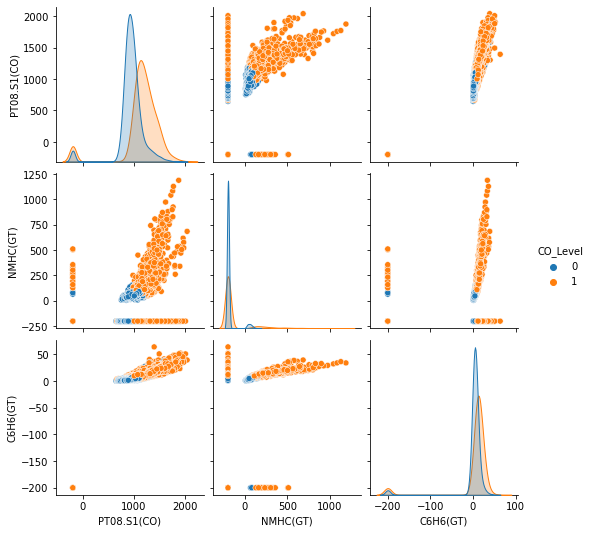

In [54]:
##Plotting all the features
sns.pairplot(data=data[['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','CO_Level']],hue='CO_Level')
plt.show()

## Decision Tree for classification:

### Step 1 Load the dataset:

In [55]:
dt=pd.read_excel(r"C:\Users\gauri\OneDrive\Desktop\Mathematical Modelling for Chemical Engineering Processes\AirQualityUCI\AirQualityUCI.xlsx")
dt.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Level
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,1
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,1
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,1
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,1
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,1


### Step 2: Create datasets with the chosen features and labels, then split the datasets into test and train sets:

In [56]:
Y=data['CO_Level']
X=data.drop(['CO_Level','Date','Time'],axis=1)

In [57]:
X_1=X[['PT08.S1(CO)','NMHC(GT)','C6H6(GT)']]

In [58]:
X_1.isnull().sum()

PT08.S1(CO)    0
NMHC(GT)       0
C6H6(GT)       0
dtype: int64

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X_1,Y,test_size=0.30)

### Step 3: Define the Decision Tree model for classification from sklearn:

In [60]:
clf=DecisionTreeClassifier()

### Step 4: Fit the train set:

In [61]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

### Step 5: After fitting the dataset, predict the values based on the test set:

In [62]:
Y_pred=clf.predict(X_test)
print(Y_pred)

[0 0 0 ... 1 0 1]


### Step 6: Check the accuracy of the model:

In [63]:
Score=accuracy_score(Y_test,Y_pred)

In [64]:
print(f"The accuracy of the Decision Tree model is:",Score*100)

The accuracy of the Decision Tree model is: 76.31766381766381


### Step 7: Visualization of the performance of the model using Confusion matrix: 

In [65]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred)

In [66]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

### The confusion matrix for the model :
The true negatives for this model are 1045, and the true positives are 1082. The model has predicted well, but there are some errors, which can be seen in the false positives (353) and the false negatives (328). These errors can be reduced by increasing the accuracy of the model.

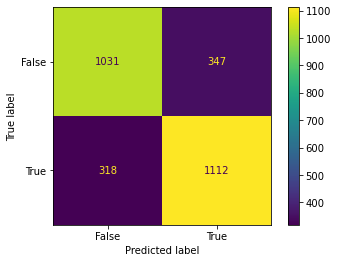

In [67]:
cm_display.plot()
plt.show()

## Results:

 - The accuracy of the logistic regression model is 76.6381 % and the accuracy of the decision tree model is 75.0356 %.

 - The accuracy of the models can be increased by tuning the hyperparameters and choosing the appropriate features.

 - The accuracy of both the models is in the same range, however the logistic regression model performed better than the decision tree model. 

 - One reason behind this can be that logistic regression is preffered for classification tasks.

 - Moreover, the accuracy of the model can be increased by hyperparameter tuning. As this is a lecture module, I have not performed hyperparameter tuning and focused more on the demonstration to build the model.

Links used for explanations:\
1.https://www.datacamp.com/tutorial/understanding-logistic-regression-python

2.https://realpython.com/logistic-regression-python/
3.https://scikit-learn.org/stable/modules/tree.html

Image link:\
4.https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

Link to the dataset used from UCI repository:\
5.https://archive.ics.uci.edu/ml/datasets/air+quality